# Supervised Learning

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
# adspy_shared_utilities.py 파일이 저장된 디렉토리를 sys.path에 등록한다.
sys.path.append('/content/drive/MyDrive/DataScience2022/chap05')

In [ ]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

## Linear models for regression

### Linear regression

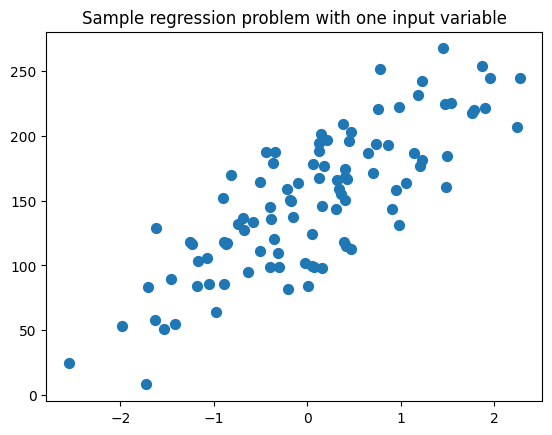

In [ ]:
# simple regression을 위한 가상적인 데이터셋을 생성한다.
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')

# Generate a random regression problem
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('prediction for a new test data {}: {}'.format(0.2, linreg.predict([[0.2]])))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492
prediction for a new test data 0.2: [157.59]


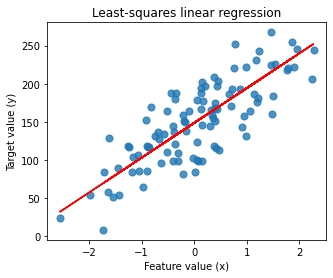

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### **사례:** Linear Regression with Community and Crime Dataset

`CommViolPredUnnormalizedData.txt` 파일로 부터 공동체와 범죄율에 대한 [데이터셋](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)을 로드한다.

In [ ]:
# Communities and Crime dataset
path_crime_csv = '/content/drive/MyDrive/DataScience2022/chap05/datasets/CommViolPredUnnormalizedData.csv'
crime_df = pd.read_csv(path_crime_csv, na_values=['?'])
crime_df

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


In [ ]:
for idx, c in enumerate(list(crime_df.columns)):
  print(idx, c)

0 communityname
1 state
2 countyCode
3 communityCode
4 fold
5 population
6 householdsize
7 racepctblack
8 racePctWhite
9 racePctAsian
10 racePctHisp
11 agePct12t21
12 agePct12t29
13 agePct16t24
14 agePct65up
15 numbUrban
16 pctUrban
17 medIncome
18 pctWWage
19 pctWFarmSelf
20 pctWInvInc
21 pctWSocSec
22 pctWPubAsst
23 pctWRetire
24 medFamInc
25 perCapInc
26 whitePerCap
27 blackPerCap
28 indianPerCap
29 AsianPerCap
30 OtherPerCap
31 HispPerCap
32 NumUnderPov
33 PctPopUnderPov
34 PctLess9thGrade
35 PctNotHSGrad
36 PctBSorMore
37 PctUnemployed
38 PctEmploy
39 PctEmplManu
40 PctEmplProfServ
41 PctOccupManu
42 PctOccupMgmtProf
43 MalePctDivorce
44 MalePctNevMarr
45 FemalePctDiv
46 TotalPctDiv
47 PersPerFam
48 PctFam2Par
49 PctKids2Par
50 PctYoungKids2Par
51 PctTeen2Par
52 PctWorkMomYoungKids
53 PctWorkMom
54 NumKidsBornNeverMar
55 PctKidsBornNeverMar
56 NumImmig
57 PctImmigRecent
58 PctImmigRec5
59 PctImmigRec8
60 PctImmigRec10
61 PctRecentImmig
62 PctRecImmig5
63 PctRecImmig8
64 PctRecImmi

In [ ]:
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
crime_df = crime_df.iloc[:,columns_to_keep].dropna()
crime_df

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.00,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,...,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88,545.75
2211,12251,2.68,17.36,31.23,16.97,12.57,12251,100.00,20321,75.06,...,17.3,14.4,0,0,2.24,75.16,49.12,78.79,92.85,124.10
2212,32824,2.46,11.81,20.96,9.53,20.73,32824,100.00,27182,59.79,...,23.9,13.1,44,0,7.35,48.66,46.73,75.54,92.30,353.83
2213,13547,2.89,17.16,30.01,14.73,10.42,0,0.00,19899,71.67,...,23.3,14.1,0,0,2.28,82.26,54.05,79.72,94.06,691.17


In [ ]:
X_crime = crime_df.iloc[:,range(0,88)]
y_crime = crime_df['ViolentCrimesPerPop']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725965846
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]
R-squared score (training): 

이번에는 `MinMax` 정규화를 적용해보자.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression().fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

R-squared score (training): 0.673
R-squared score (test): 0.496


결과에는 아무 차이가 없다. **왜 그럴까?**

### Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846137
ridge regression linear model coeff:
[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.33e-04
  3.14e-04 -4.14e-04 -1.79e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e-01 -2.68e

#### Ridge regression with feature normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044153
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.612061998579
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with n

#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)

    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



### Polynomial regression

(100, 7)
(100,)


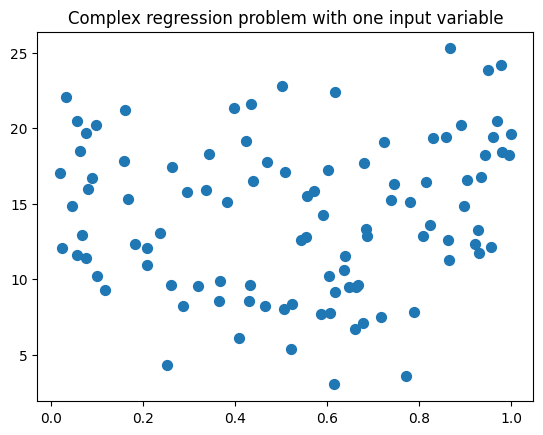

In [ ]:
# 조금 더 복잡한 regression을 위해서 가상 데이터셋인 Friedman #1 데이터셋을 생성해보자.
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)
print(X_F1.shape)
print(y_F1.shape)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
print('Shape of polynomial features: {}'.format(X_F1_poly.shape))
print(X_F1_poly)


X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

Shape of polynomial features: (100, 36)
[[1.00e+00 5.49e-01 7.15e-01 ... 4.17e-01 2.83e-01 1.91e-01]
 [1.00e+00 8.92e-01 9.64e-01 ... 3.23e-01 5.26e-01 8.57e-01]
 [1.00e+00 7.10e-02 8.71e-02 ... 7.57e-01 8.51e-01 9.58e-01]
 ...
 [1.00e+00 4.05e-01 4.05e-01 ... 1.21e-02 6.66e-02 3.68e-01]
 [1.00e+00 7.03e-01 6.35e-01 ... 8.52e-04 1.56e-02 2.86e-01]
 [1.00e+00 4.04e-01 5.24e-01 ... 2.68e-01 4.37e-01 7.10e-01]]
(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.

## Linear models for classification

### Logistic regression

#### 과일 데이터셋: `height`와 `width` 두 가지 feature만 사용 (positive class: apple, negative class: others)

In [ ]:
fruits = pd.read_table('/content/drive/MyDrive/DataScience2023/chap06_machine_learning/datasets/fruit_data_with_colors.txt')
fruits = fruits.dropna()

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

<ipython-input-16-e99e4d93f23e>:24: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
<ipython-input-16-e99e4d93f23e>:29: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


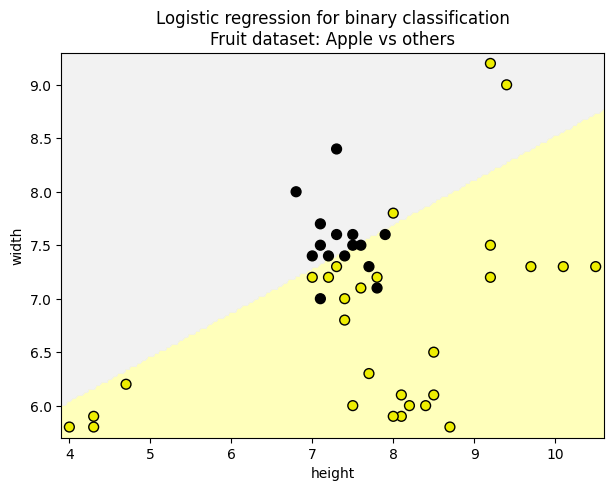

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.to_numpy(),
                y_fruits_apple.to_numpy(),
                random_state = 0))


clf = LogisticRegression(C=100).fit(X_train, y_train)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

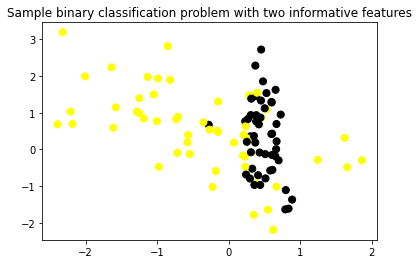

In [ ]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


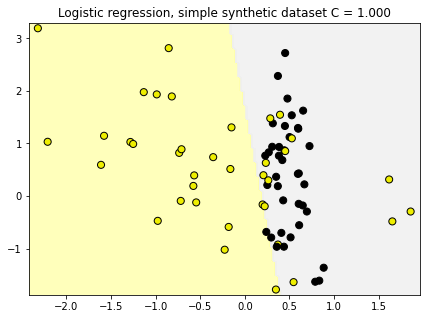

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


#### Logistic regression regularization: C parameter

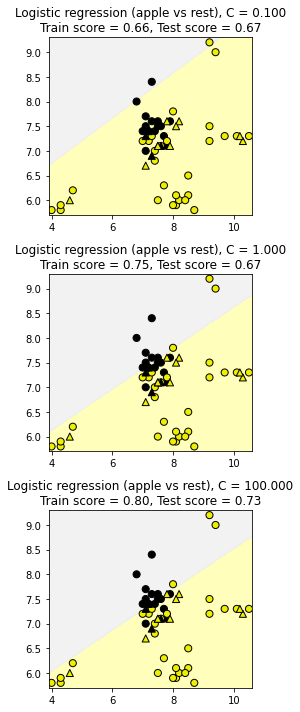

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.to_numpy(),
                y_fruits_apple.to_numpy(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)

    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### **사례:** `breast_cancer` Dataset

이번에는 `sklearn.datasets`가 제공하는 `breast_cancer` 데이터셋을 로드한다.

In [ ]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [ ]:
cancer

{'data': array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 2.65e-01, 4.60e-01, 1.19e-01],
        [2.06e+01, 1.78e+01, 1.33e+02, ..., 1.86e-01, 2.75e-01, 8.90e-02],
        [1.97e+01, 2.12e+01, 1.30e+02, ..., 2.43e-01, 3.61e-01, 8.76e-02],
        ...,
        [1.66e+01, 2.81e+01, 1.08e+02, ..., 1.42e-01, 2.22e-01, 7.82e-02],
        [2.06e+01, 2.93e+01, 1.40e+02, ..., 2.65e-01, 4.09e-01, 1.24e-01],
        [7.76e+00, 2.45e+01, 4.79e+01, ..., 0.00e+00, 2.87e-01, 7.04e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_cancer.shape

(569, 30)

In [ ]:
y_cancer.shape

(569,)

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression().fit(X_train_scaled, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96


### Support Vector Machines

#### Linear Support Vector Machine

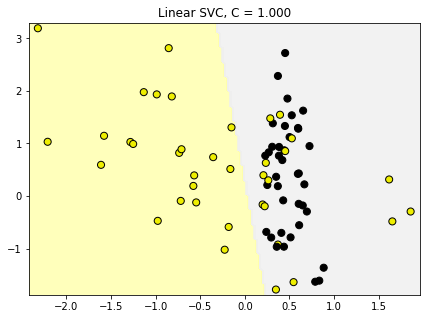

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

this_C = 1.0
clf = SVC(kernel='linear', C=this_C).fit(X_train, y_train)

title = 'Linear SVC, C = {:.3f}'.format(this_C)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


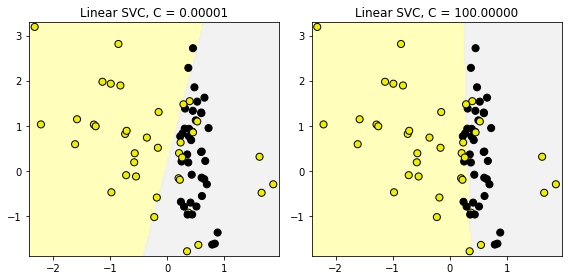

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.90
Accuracy of Linear SVC classifier on test set: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LinearSVC().fit(X_train_scaled, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.98
Accuracy of Linear SVC classifier on test set: 0.97


### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.3   0.72]
 [-1.63  1.16]
 [ 0.01  0.43]
 [ 1.25 -1.64]]
Intercepts:
 [-3.29  1.2  -3.04  1.16]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Multi-class results on the fruit dataset

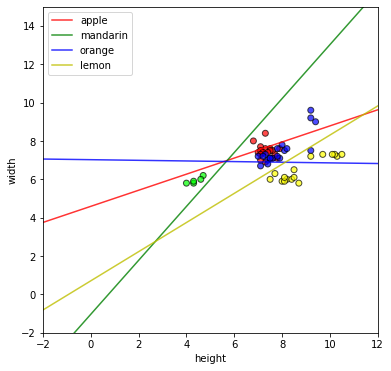

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)

plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

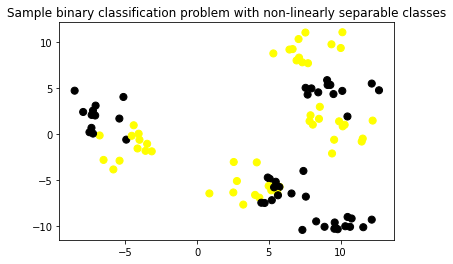

In [ ]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

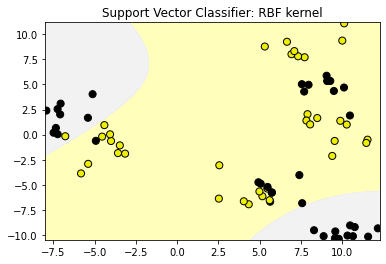

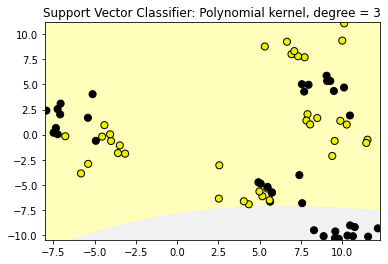

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

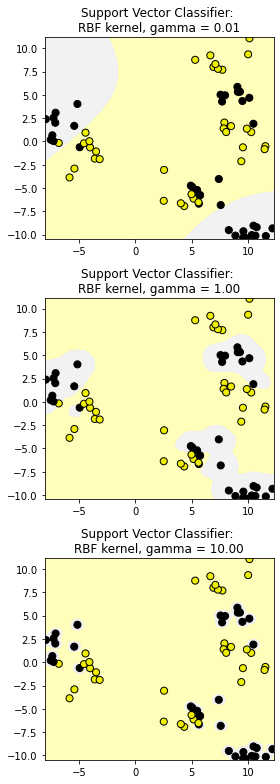

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter

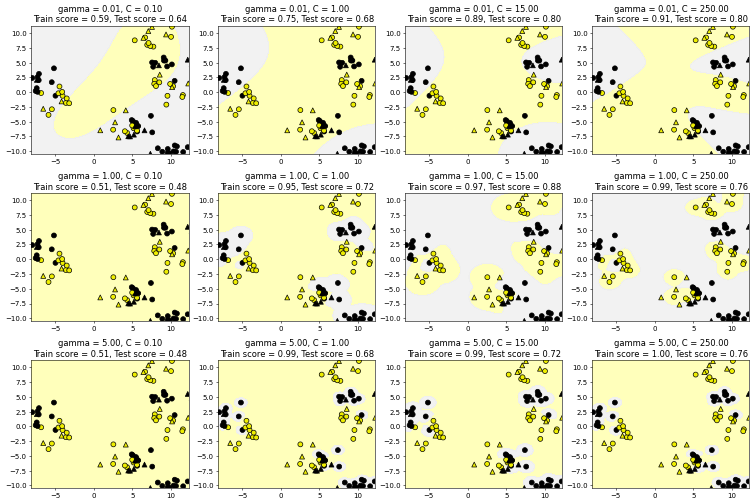

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):

    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### **사례**: `cancer_datasets` without normalization

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


### **사례**: `cancer_datasets` with normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.99
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


## Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Setting max decision tree depth to help avoid overfitting

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

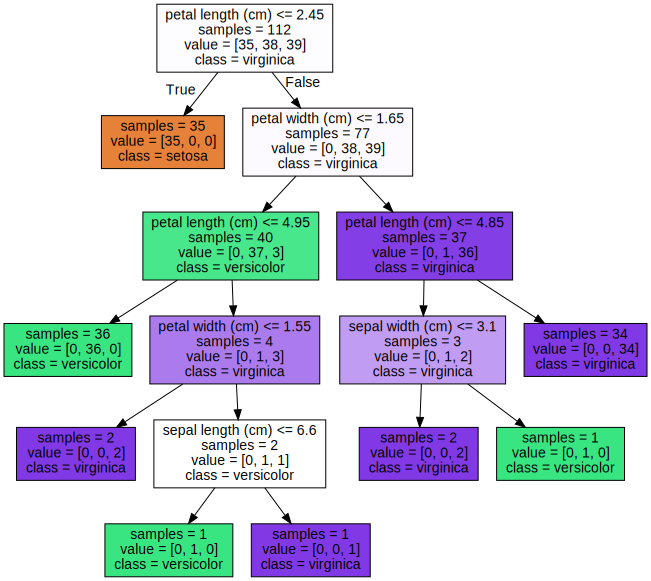

In [ ]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

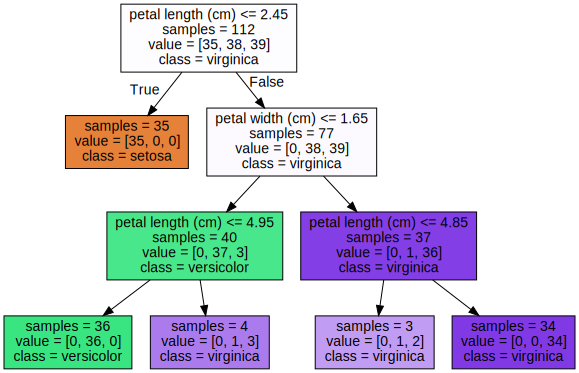

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### Feature importance

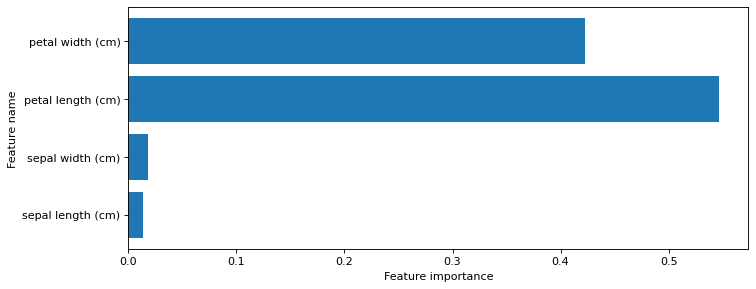

Feature importances: [0.01 0.02 0.55 0.42]


In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

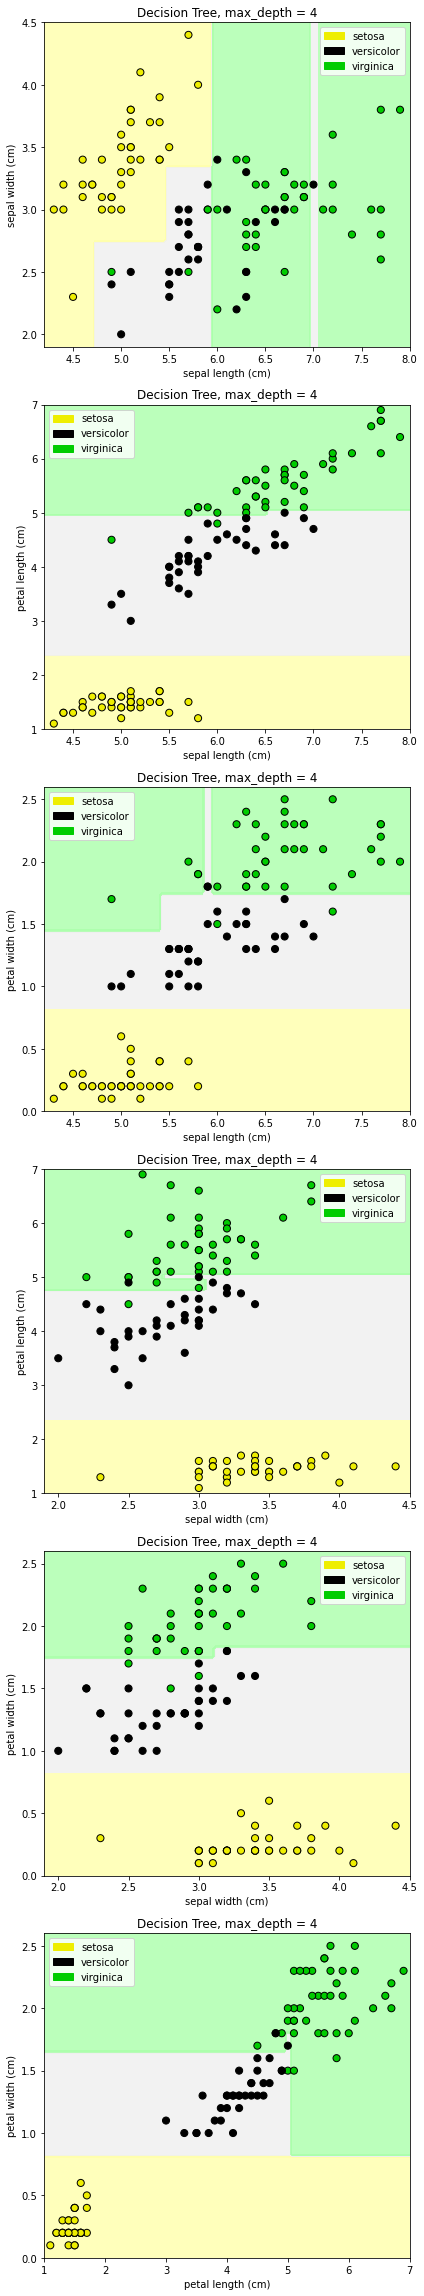

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train

    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)

    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])

plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

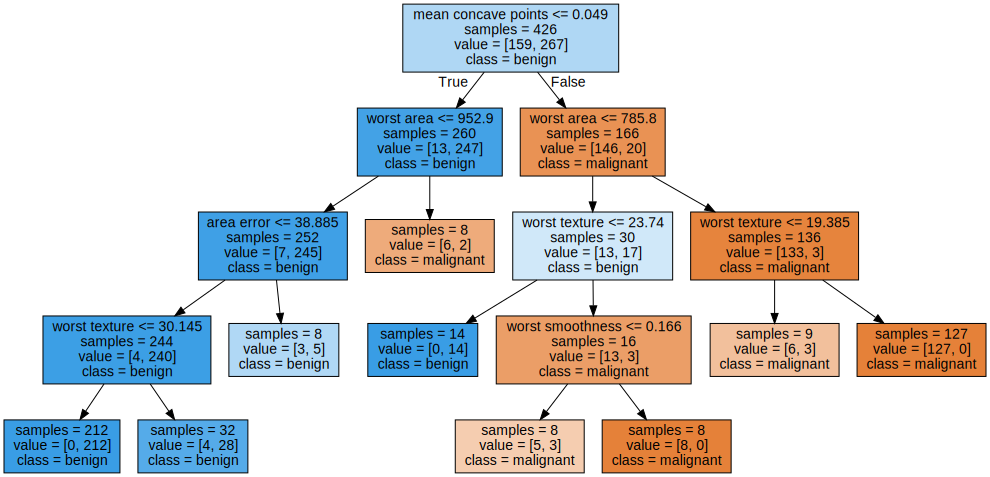

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


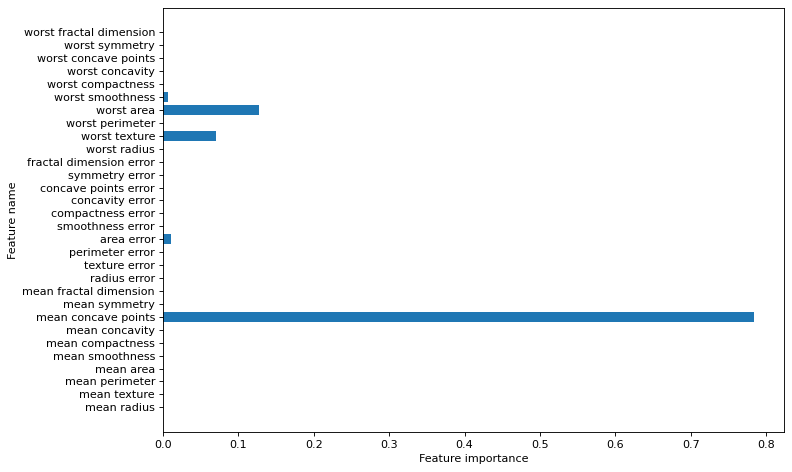

In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

In [ ]:
clf.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.78, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07,
       0.  , 0.13, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ])